# Daria Bromot - FS500047

## Logistic Regression Project 


## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [121]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


** Use info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

**Create a histogram of the Age**

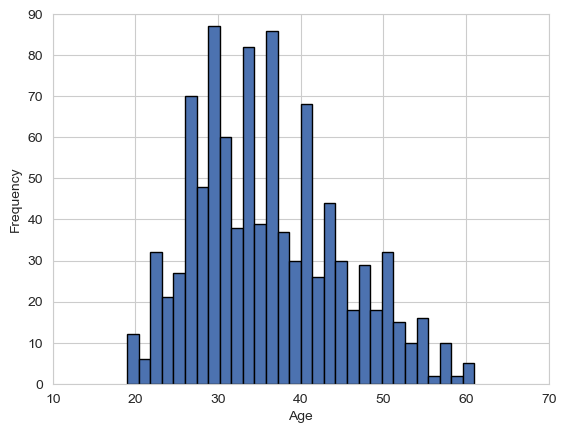

In [12]:
ad_data['Age'].hist(bins=30, color='#4c72b0', edgecolor='black')
plt.xlim(10, 70)
plt.ylim(0, 90)
plt.xlabel('Age')
plt.show()

**Create a jointplot showing Area Income versus Age.**

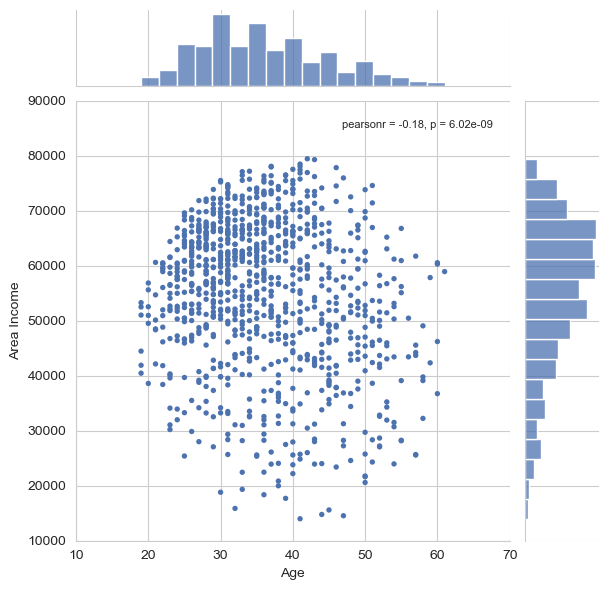

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set_style('whitegrid')
jp = sns.jointplot(x='Age', y='Area Income', data=ad_data, edgecolor='None', s=15, color='#4c72b0')

jp.ax_joint.set_xlim(10, 70)
jp.ax_joint.set_ylim(10000, 90000)


corr, p = pearsonr(ad_data['Age'], ad_data['Area Income'])
text = f'pearsonr = {corr:.2f}, p = {p:.2e}'
plt.text(-300, 85000, text, fontsize=8)

plt.show()

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

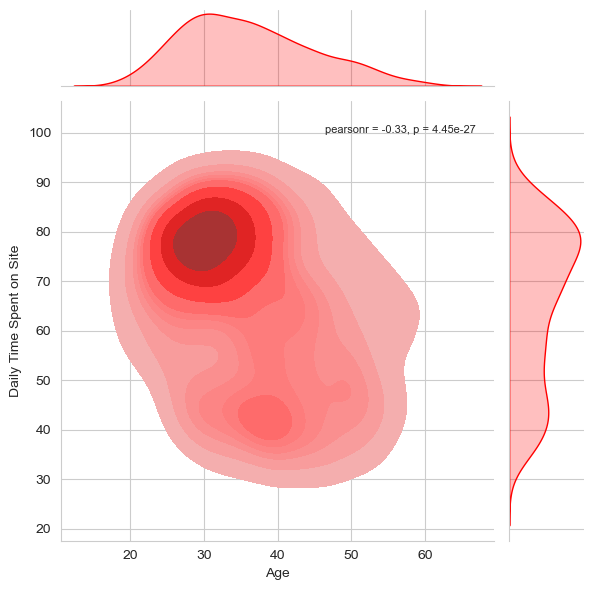

In [91]:
jp = sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, color='red', kind='kde', fill=True)

corr, p = pearsonr(ad_data['Age'], ad_data['Daily Time Spent on Site'])
text = f'pearsonr = {corr:.2f}, p = {p:.2e}'
plt.text(-0.07, 100, text, fontsize=8)

plt.show()

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

Text(-350, 285, 'pearsonr = 0.52, p = 6.01e-70')

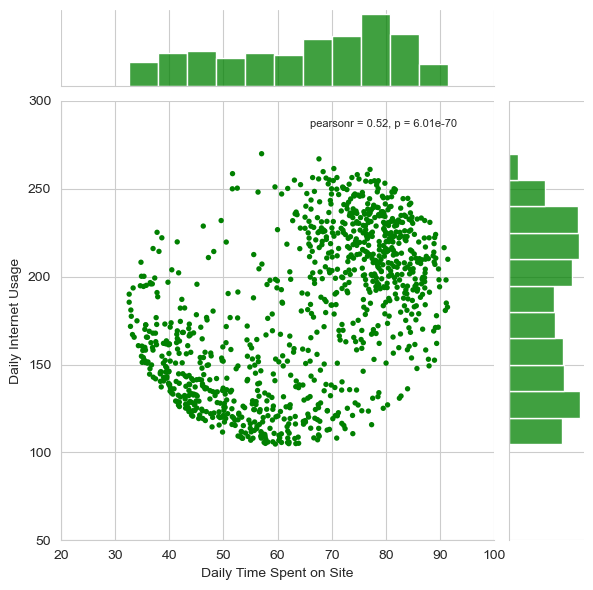

In [105]:
jp = sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',edgecolor='None', s=15, data=ad_data, color='green')

jp.ax_joint.set_xlim(20, 100)
jp.ax_joint.set_ylim(50, 300)

corr, p = pearsonr(ad_data['Daily Time Spent on Site'], ad_data['Daily Internet Usage'])
text = f'pearsonr = {corr:.2f}, p = {p:.2e}'
plt.text(-350, 285, text, fontsize=8)

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

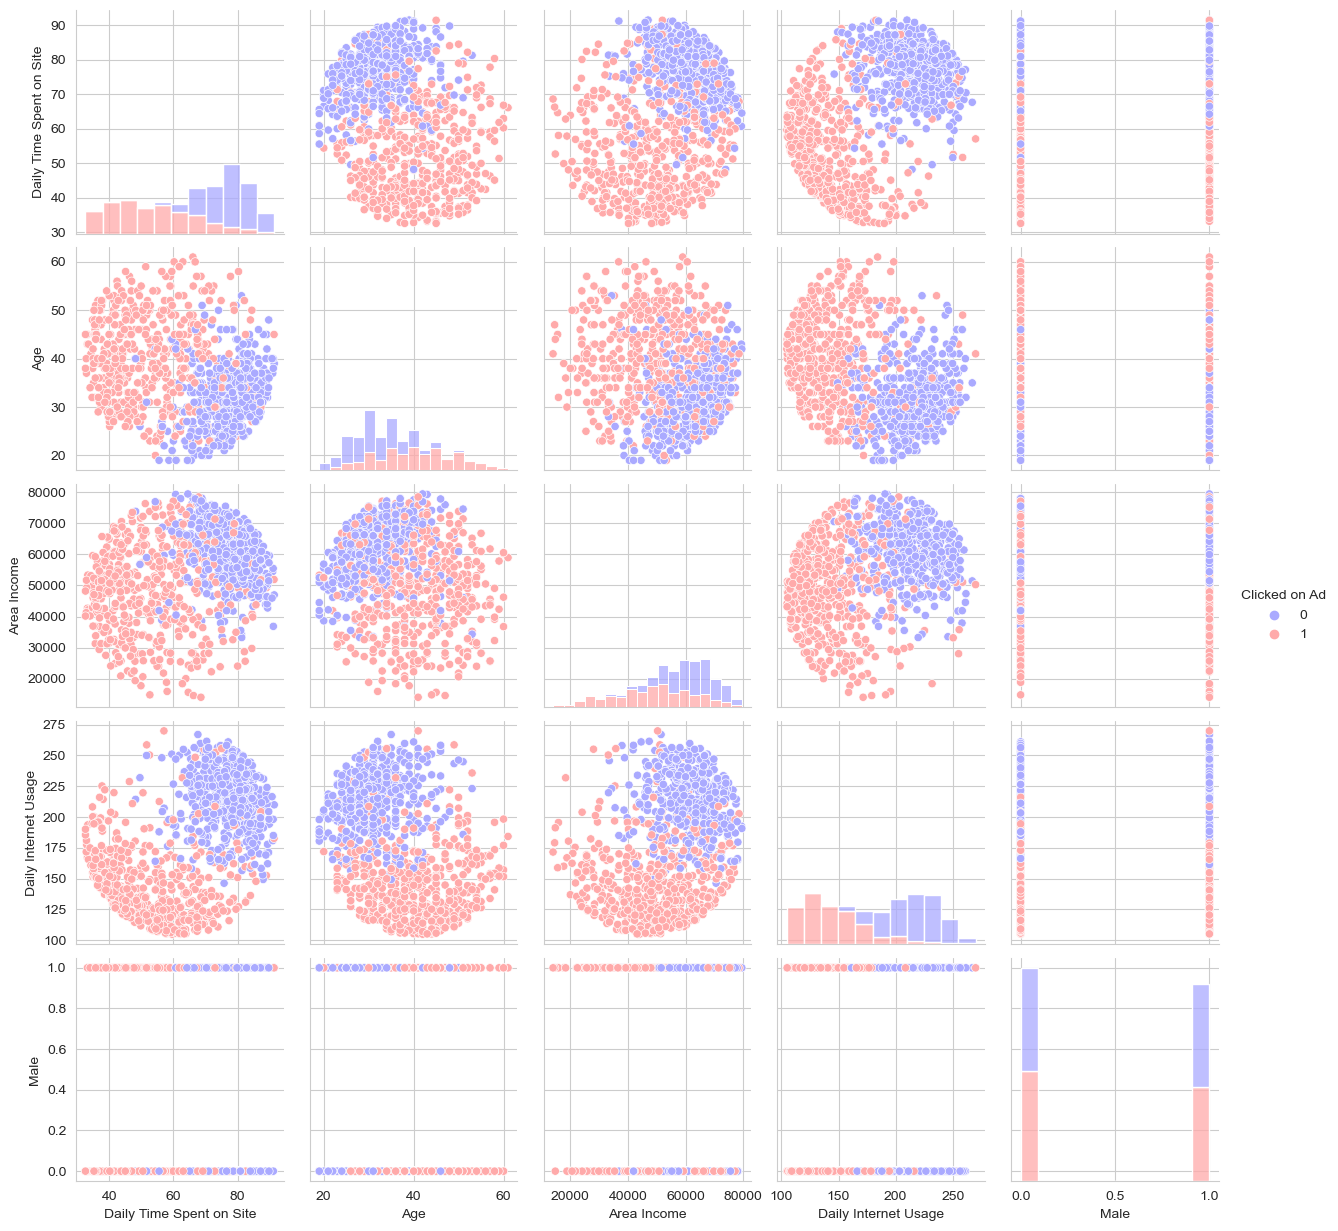

In [109]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr',diag_kind='hist', diag_kws=dict(multiple="stack"))

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [115]:
from sklearn.model_selection import train_test_split

Based on the charts above, I would train my model using the following fields:

- Daily Time Spent on Site
- Age
- Area of Income
- Daily Internet Usage
- Male

In [122]:
ad_data.drop(['Timestamp', 'City', 'Country', 'Ad Topic Line'], axis = 1, inplace = True)

In [133]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [124]:
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop('Clicked on Ad', axis = 1), ad_data['Clicked on Ad'], test_size = 0.3, random_state = 101)

**Train and fit a logistic regression model on the training set.**

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
lg = LogisticRegression()

In [127]:
lg.fit(X_train, y_train)

LogisticRegression()

## Predictions and Evaluations
**Now predict values for the testing data.**

In [128]:
predictions = lg.predict(X_test)

**Create a classification report for the model.**

In [129]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [130]:
print('Logistic Regression Accuracy: {}'.format(accuracy_score(y_test,predictions)))

Logistic Regression Accuracy: 0.9266666666666666


In [131]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [132]:
print(confusion_matrix(y_test,predictions))

[[149   8]
 [ 14 129]]


- **149** of our model’s guesses were True Positive i.e. the model thought the users clicked on the ad (outcome of 1), and they indeed clicked on the ad
- **129** of our model’s guesses were True Negative i.e. the model thought the users did not click on the ad (outcome of 0), and they indeed did not click on the ad
- **14** of our model’s guesses were False Negative i.e. the model thought the users did not click on the ad (outcome of 0), but they actually did click on the ad
- **8** of our model’s guesses were False Positive i.e. the model thought the users clicked on the ad (outcome of 1), but they actually did not click on the ad

Our confusion matrix tells us that the total number of accurate predictions is 149 + 129 = 278. It also tells us that the number of incorrect predictions is 14 + 8 = 22.